In [1]:
import numpy as np
import h5py
import os

import matplotlib.pyplot as plt

from helpers import build_experiment_name

%matplotlib inline

In [2]:
# path where the models are
path  = '/data/lisatmp4/romerosa/itinf/models/'

In [3]:
# model info
dataset = 'camvid'

segm_net = 'fcn8'

dae_dict = {'kind': 'standard',
            'dropout': 0.5,
            'skip': True,
            'unpool_type': 'trackind',
            'n_filters': 32,
            'conv_before_pool': 1,
            'additional_pool': 2,
            'concat_h': ['pool4'],
            'noise': 0,
            'from_gt': False,
            'temperature': 1.0,
            'layer': 'probs_dimshuffle',
            'exp_name': '',
            'data_aug': True}

train_dict = {'training_loss': ['crossentropy'],
              'learning_rate': 0.0001,
              'lr_anneal': 0.99,
              'weight_decay': 0.0001,
              'optimizer': 'rmsprop'}

merge_dict = {}
merge_dict.update(dae_dict)
merge_dict.update(train_dict)

In [4]:
# build experiment name from model info
exp_name = build_experiment_name(segm_net=segm_net, **merge_dict)

exp_path = os.path.join(path, dataset, exp_name)
last = 'dae_errors_last.npz'
best = 'dae_errors_best.npz'

fcn8_standard_pool4_f32c1p2_skip_trackind_dropout0.5_crossentropy_fromfcn8_z0_data_aug_T1.0_rmsprop_lr0.0001_anneal0.99_decay0.0001_probs_dimshuffle


In [5]:
err_plot = np.load(os.path.join(exp_path, last))
err_train = err_plot['arr_0']
err_val = err_plot['arr_1']
jacc_val = err_plot['arr_2']

TRAIN: 0.159451301235
VALID: 0.250474126502


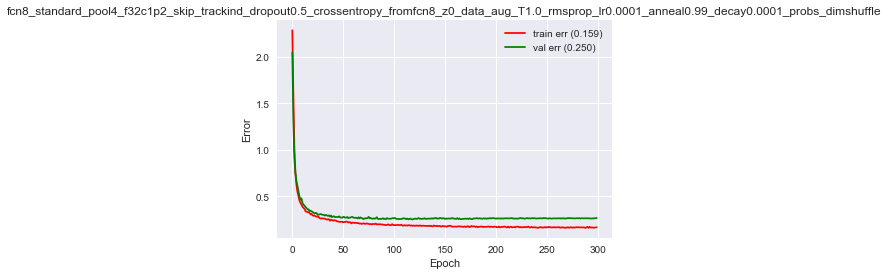

In [6]:
max_epoch = len(err_train)
epochs = range(max_epoch)

# Plot data
plt.plot(epochs, err_train, 'r', label='train err ({:.3f})'.format(np.min(err_train)))
plt.plot(epochs, err_val, 'g', label='val err ({:.3f})'.format(np.min(err_val)))

# Add legend
plt.legend()

# Add title
plt.title(exp_name)
plt.xlabel('Epoch')
plt.ylabel('Error')

print('TRAIN: ' + str(err_train.min()))
print('VALID: ' + str(err_val.min()))

VALID: 0.674096


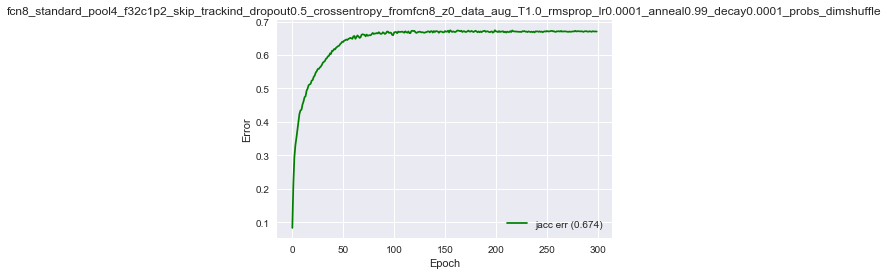

In [7]:
# Plot data
plt.plot(epochs, jacc_val, 'g', label='jacc err ({:.3f})'.format(np.max(jacc_val)))

# Add legend
plt.legend()

# Add title
plt.title(exp_name)
plt.xlabel('Epoch')
plt.ylabel('Error')

print('VALID: ' + str(jacc_val.max()))